# Pseudocode

## Input Process

In [7]:
vector<vector<int>> get_board():
    read input_string
    parse input into 2x3 board
    return board

In this function I use *_getline_* to handle the input string, and store it into a 2x3 vector.

## Compute Manhattan Distance

In [8]:
int manhattan(board):
    compute sum of Manhattan distances for all tiles
    return distance

This function calculating the manhattan distances as heuristic function.

## Define State Structure

In [9]:
struct State:
    board, g, h, path

    char get_priority(move): return priority order

    operator<(other_state):
        return compare (g + h), or path priority

This struct record the state of the board at a certain time. Including actual cost g, heuristic function h, and current path. And a function used to define the priority of the path.

## Generate Next States

In [10]:
vector<State> get_next_state(current_state):
    find empty tile position
    generate new states by moving empty tile in valid directions
    return list of new states

This function return a vector that store states, it will look for the neighbors of given state. And automatically update g by plus 1, calculate the manhattan and updating the path to the state.

## Convert Board to String

In [11]:
string board_to_str(board):
    return string representation of board

trans board vector to string, later it will be used to check for state has been visited or not.

## Solve Puzzle Using A* Search

In [ ]:
string solve_puzzle(board):
    initialize priority queue pq, visited map
    create start_state, INSERT into pq and visited

    while pq is not empty:
        pop state with lowest (g + h)
        if goal reached, return path

        for each neighbor in get_next_state(current_state):
            if neighbor not in visited or has lower g:
                update visited, push into pq

    return "None"

This function using A* search. It used a priority queue to determine which path to explore next, the one that has lowest g + h will be considered, if they have same cost, the function will compare their path, following by l -> u -> r -> d priority to determine. if it find a solution, return the path, otherwise it return None.

## Main Function

In [7]:
int main():
    board = get_board()
    solution_path = solve_puzzle(board)
    print solution length and path

Implement the above function and output results.

# Problems Encountered During Implementation

## Input Format

During coding, the first problem I met is the input format, I thought the input should be a continuous string without blank, and it caused problem in testing. I've simply used a *_for_* loop to iterate through the string, but this makes it impossible to read the contents of trailing spaces because I'm using the *_cin_* command.

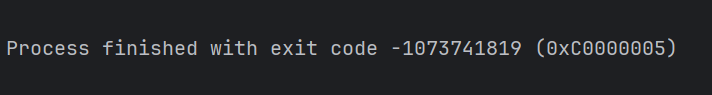

In [1]:
from IPython.display import Image
Image("notebook_image/p1.png")

To solve this, I use *_getline_* to handle the problem and it successfully solved the problem and can read the whole line of input with space.

In [ ]:
string input;
getline(cin, input);

## Priorty Queue

During coding, I found that the priority queue does not work properly since it cannot correctly arrange the right state, the state with higher cost will line before low cost as follows.

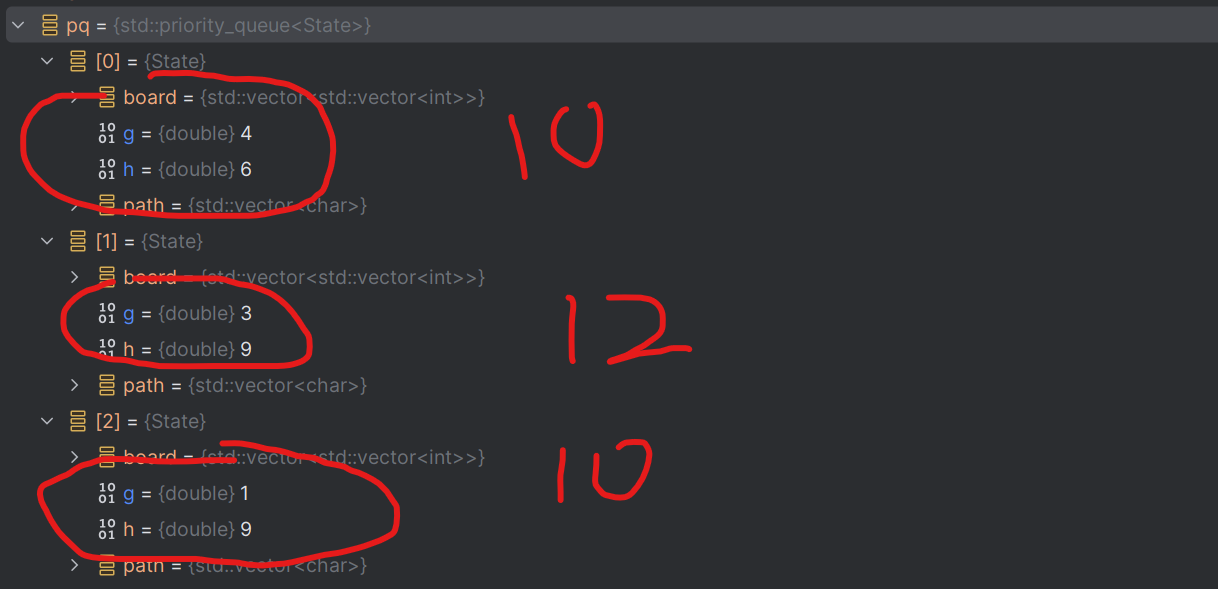

In [2]:
Image("notebook_image/p2.png")

Then it will lead to incorrect path like below: the path are not the optimal

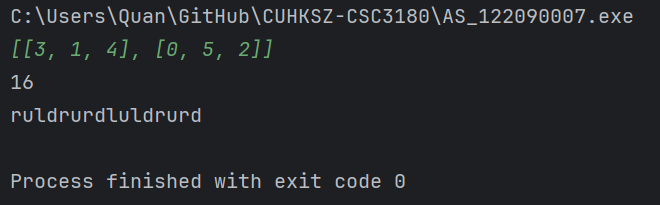

In [3]:
Image("notebook_image/p5.png")

To solve this problem, I went back to _*struct*_, and implemented operator overloading.

In [ ]:
bool operator<(const State& other_state) const {
        if (g + h == other_state.g + other_state.h) {
            string path1, path2;
            for (auto i: path) {
                path1 += get_priority(i);
            }
            for (auto i: other_state.path) {
                path2 += get_priority(i);
            }
            return path1 > path2;
        } else {
            return (g + h) > (other_state.g + other_state.h);
        }
    }

In this way the priority queue can correctly determine the queue of the state and implementing A* search and the path is the optimal.

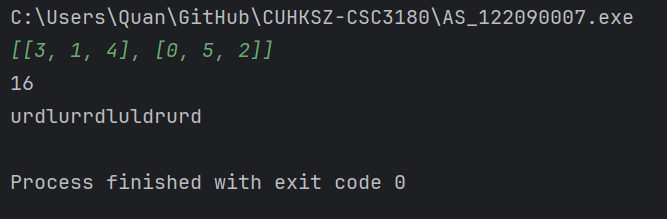

In [4]:
Image("notebook_image/p4.png")

## Visted States

During coding, I first used an unordered set to record the state that has been visited to avoid infinite loop for searching, later on I found that this implementation may prematurely mark certain states as visited, causing shorter paths that should have been explored later to be ignored. By using an unordered set for visited states, some suboptimal paths might be recorded first, preventing the algorithm from updating to a more optimal path when it is discovered later. Below are the wrong steps and path:

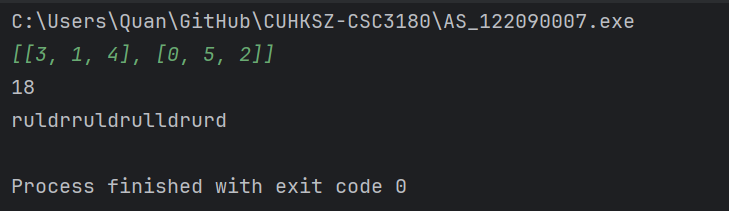

In [5]:
Image("notebook_image/p3.png")

Instead, using an unordered map to store the g value (cost from the start) allows the algorithm to properly update and prioritize shorter paths when a better route is found. Below are the correct path:

In [ ]:
for (auto neighbor : get_next_state(current)) {
            string state_str = board_to_str(neighbor.board);
            if (visited.find(state_str) == visited.end() or visited[state_str] > neighbor.g) {
                visited[state_str] = neighbor.g;
                pq.push(neighbor);
            }
        }

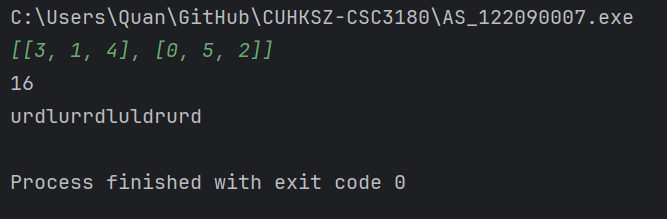

In [6]:
Image("notebook_image/p4.png")